### "Urban Lifestyle & Health Impact Survey: A Multivariate Behavioral Analysis of Metro City Residents"

#### Objectives:
#### We aim to analyze how modern lifestyle habits (like screen time, sleep, pollution, etc.) influence health outcomes such as:

    Stress level

    Self-rated health

    Presence of chronic disease

    Diabetic flag

    Anxiety level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load our dataset
df = pd.read_csv('urban_lifestyle_health_survey.csv')
df.head()

,age,gender,city,occupation_type,income_bracket,education_level,sleep_hours,screen_time_hours,junk_food_freq,physical_activity_level,...,stress_level,social_media_time,chronic_disease_flag,diabetic_flag,air_pollution_exposure,commute_hours_daily,family_history_disease,no_of_doctor_visits_year,anxiety_level_score,work_life_balance_score
0,56,Male,NaN,Student,Medium,12th,10.975571,NaN,Often,Light,...,2,6.756939,0,0,162.849630,4.352632,0,4,2,4
1,46,Male,Delhi,Student,High,12th,11.805403,12.025180,Never,Intense,...,2,NaN,0,1,145.716297,4.248971,1,3,8,1
2,32,Other,Chennai,Freelancer,Medium,UG,10.164942,10.653250,Daily,NaN,...,2,5.795535,0,0,168.602212,5.000000,1,5,5,7
3,60,Other,Hyderabad,Student,NaN,NaN,10.308470,10.680931,Never,Intense,...,5,6.499053,0,0,176.965789,3.863849,0,4,6,3
4,25,Male,Delhi,Field Job,High,UG,10.228145,9.353130,Often,NaN,...,1,7.733844,0,0,157.262981,3.852620,0,1,10,10


In [3]:
print('columns name:',df.columns.tolist())

columns name: ['age', 'gender', 'city', 'occupation_type', 'income_bracket', 'education_level', 'sleep_hours', 'screen_time_hours', 'junk_food_freq', 'physical_activity_level', 'alcohol_consumption', 'smoking_status', 'self_rated_health', 'bmi', 'stress_level', 'social_media_time', 'chronic_disease_flag', 'diabetic_flag', 'air_pollution_exposure', 'commute_hours_daily', 'family_history_disease', 'no_of_doctor_visits_year', 'anxiety_level_score', 'work_life_balance_score']


In [4]:
print('shape of our data:',df.shape)

shape of our data: (5000, 24)


In [5]:
df.isnull().sum()

age                            0
gender                       485
city                         481
occupation_type              513
income_bracket               511
education_level              536
sleep_hours                    0
screen_time_hours            500
junk_food_freq               522
physical_activity_level     1637
alcohol_consumption          529
smoking_status               490
self_rated_health            497
bmi                          500
stress_level                   0
social_media_time            500
chronic_disease_flag           0
diabetic_flag                  0
air_pollution_exposure         0
commute_hours_daily          500
family_history_disease         0
no_of_doctor_visits_year       0
anxiety_level_score            0
work_life_balance_score        0
dtype: int64

we will start data cleaning process from here: firstly we will handle missing values depending on column   

In [6]:
# Fill mode (most common value) for categorical columns
cat_mode_cols = [
    'gender', 'city', 'occupation_type', 'income_bracket',
    'education_level', 'junk_food_freq', 'alcohol_consumption',
    'smoking_status', 'self_rated_health'
]
for col in cat_mode_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value) 


In [7]:
df['physical_activity_level'] = df['physical_activity_level'].fillna('Unknown')

In [8]:
# checking the missing values
df.isnull().sum()

age                           0
gender                        0
city                          0
occupation_type               0
income_bracket                0
education_level               0
sleep_hours                   0
screen_time_hours           500
junk_food_freq                0
physical_activity_level       0
alcohol_consumption           0
smoking_status                0
self_rated_health             0
bmi                         500
stress_level                  0
social_media_time           500
chronic_disease_flag          0
diabetic_flag                 0
air_pollution_exposure        0
commute_hours_daily         500
family_history_disease        0
no_of_doctor_visits_year      0
anxiety_level_score           0
work_life_balance_score       0
dtype: int64

In [9]:
# Fixing numerical data
num_median_cols = [
    'screen_time_hours', 'bmi', 'social_media_time', 'commute_hours_daily'
]

for col in num_median_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)


In [10]:
print("Missing values after all cleaning:")
print(df.isnull().sum())

Missing values after all cleaning:
age                         0
gender                      0
city                        0
occupation_type             0
income_bracket              0
education_level             0
sleep_hours                 0
screen_time_hours           0
junk_food_freq              0
physical_activity_level     0
alcohol_consumption         0
smoking_status              0
self_rated_health           0
bmi                         0
stress_level                0
social_media_time           0
chronic_disease_flag        0
diabetic_flag               0
air_pollution_exposure      0
commute_hours_daily         0
family_history_disease      0
no_of_doctor_visits_year    0
anxiety_level_score         0
work_life_balance_score     0
dtype: int64


#### since we have our data cleaned  , we will now performe explanatory data analysis

In [11]:
import scipy.stats as stats

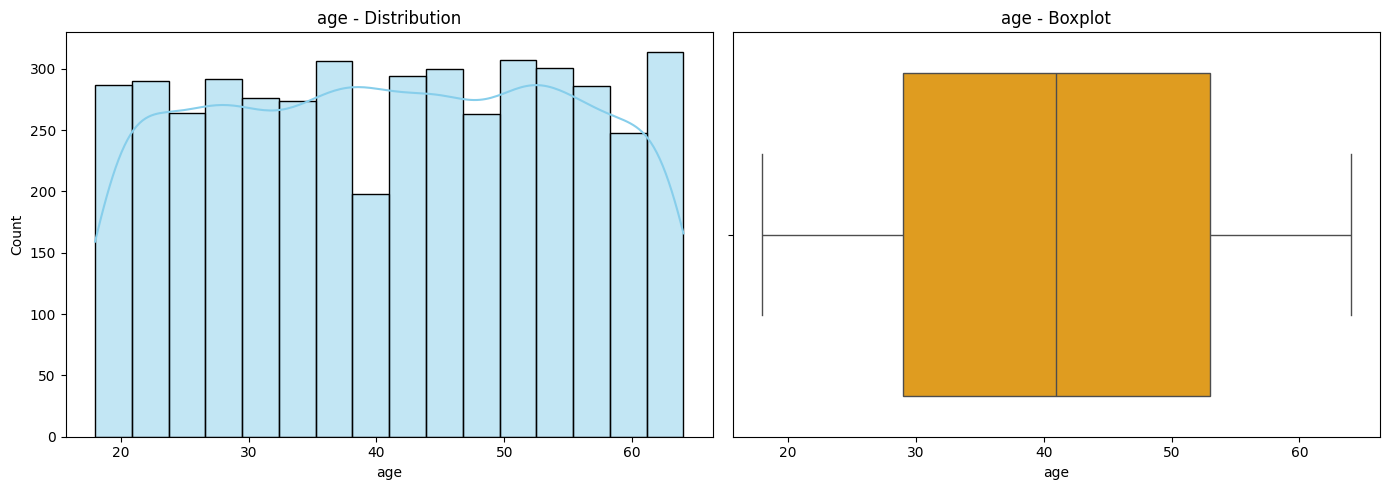

 age Summary:
Mean: 41.13, Median: 41.00
Skewness: -0.01, Kurtosis: -1.18
------------------------------------------------------------


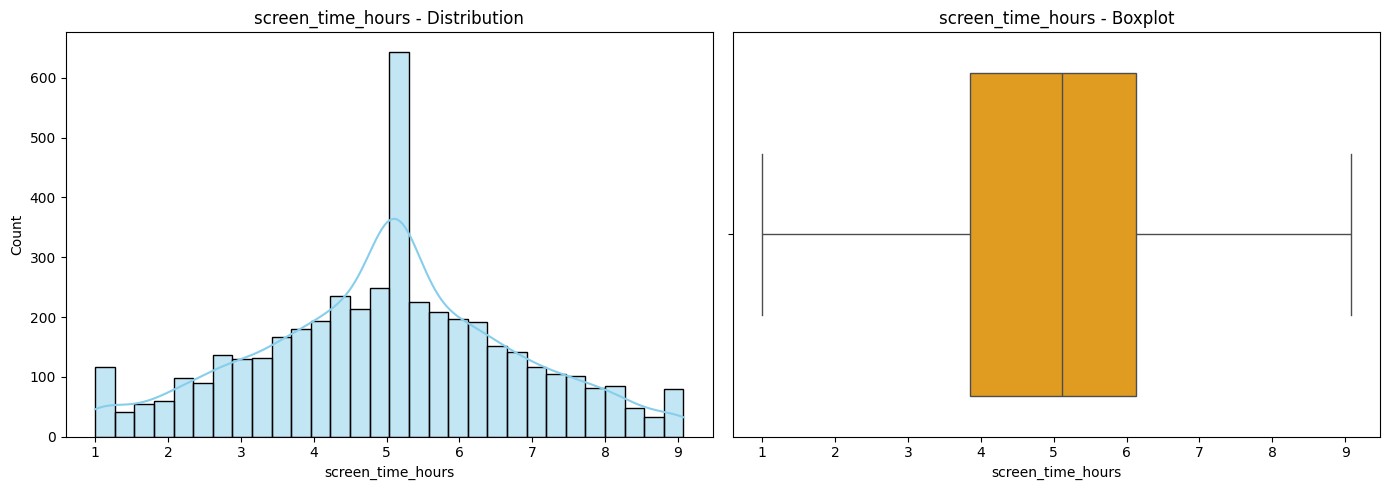

 screen_time_hours Summary:
Mean: 4.99, Median: 5.12
Skewness: -0.04, Kurtosis: -0.25
------------------------------------------------------------


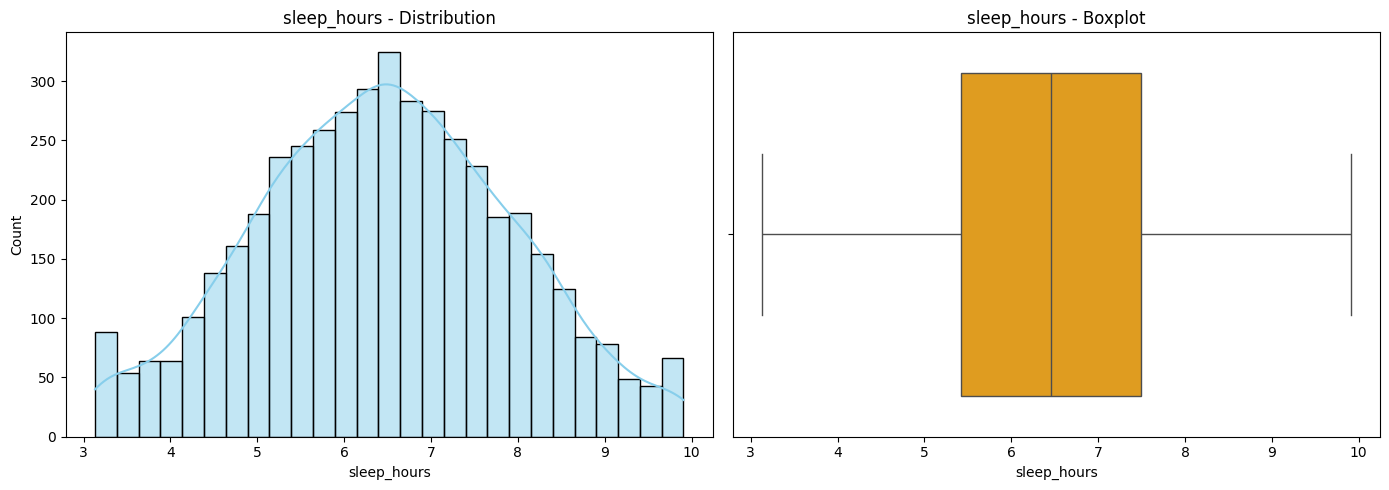

 sleep_hours Summary:
Mean: 6.46, Median: 6.45
Skewness: 0.01, Kurtosis: -0.41
------------------------------------------------------------


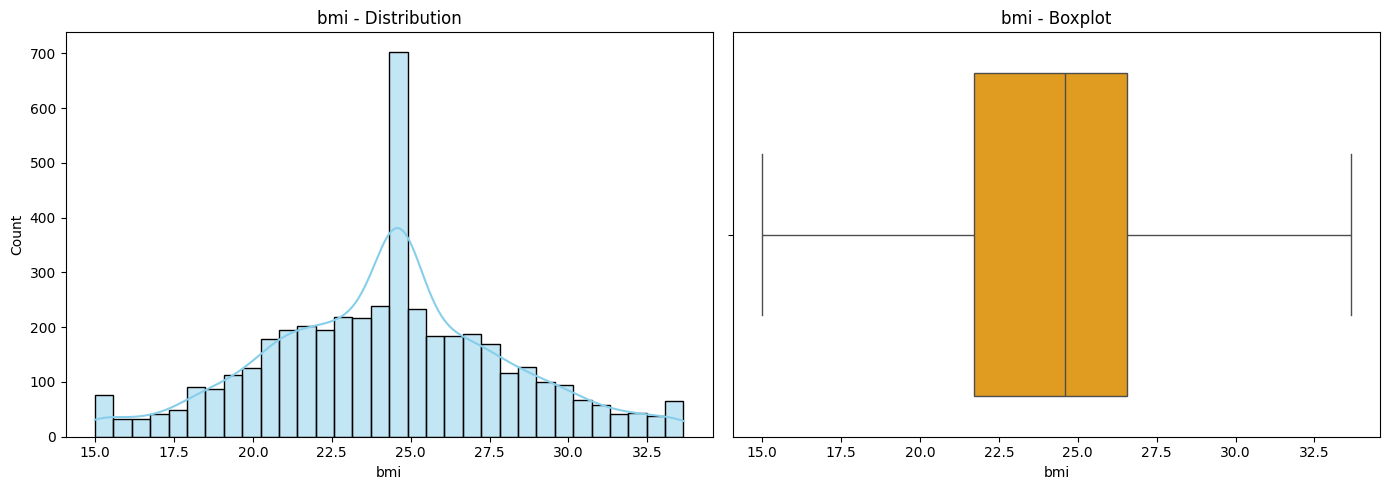

 bmi Summary:
Mean: 24.25, Median: 24.61
Skewness: 0.03, Kurtosis: -0.02
------------------------------------------------------------


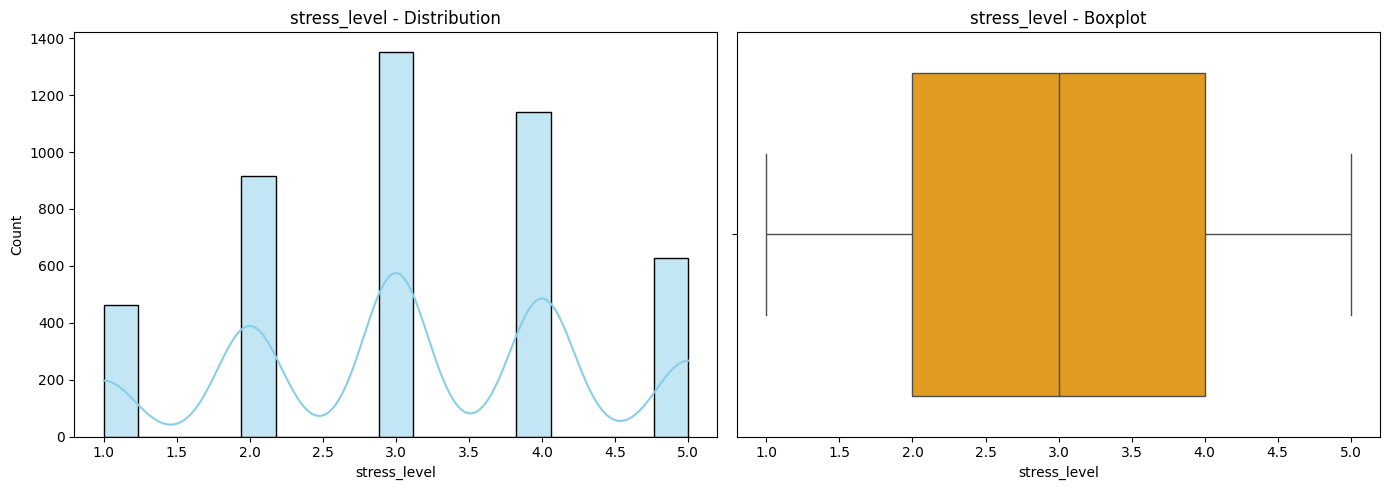

 stress_level Summary:
Mean: 3.12, Median: 3.00
Skewness: -0.11, Kurtosis: -0.84
------------------------------------------------------------


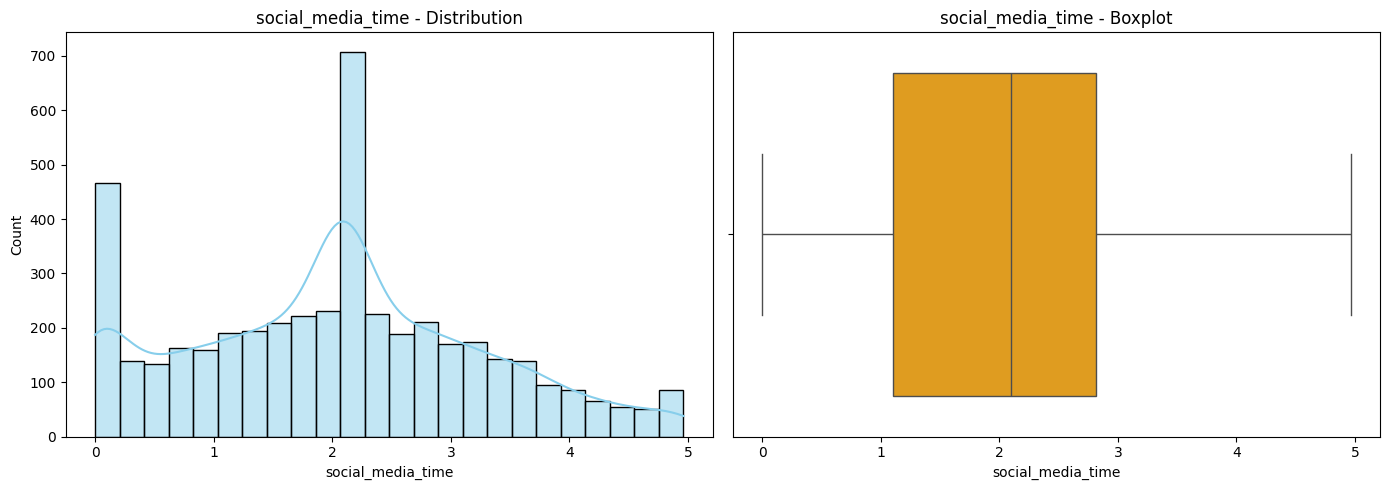

 social_media_time Summary:
Mean: 2.02, Median: 2.09
Skewness: 0.19, Kurtosis: -0.53
------------------------------------------------------------


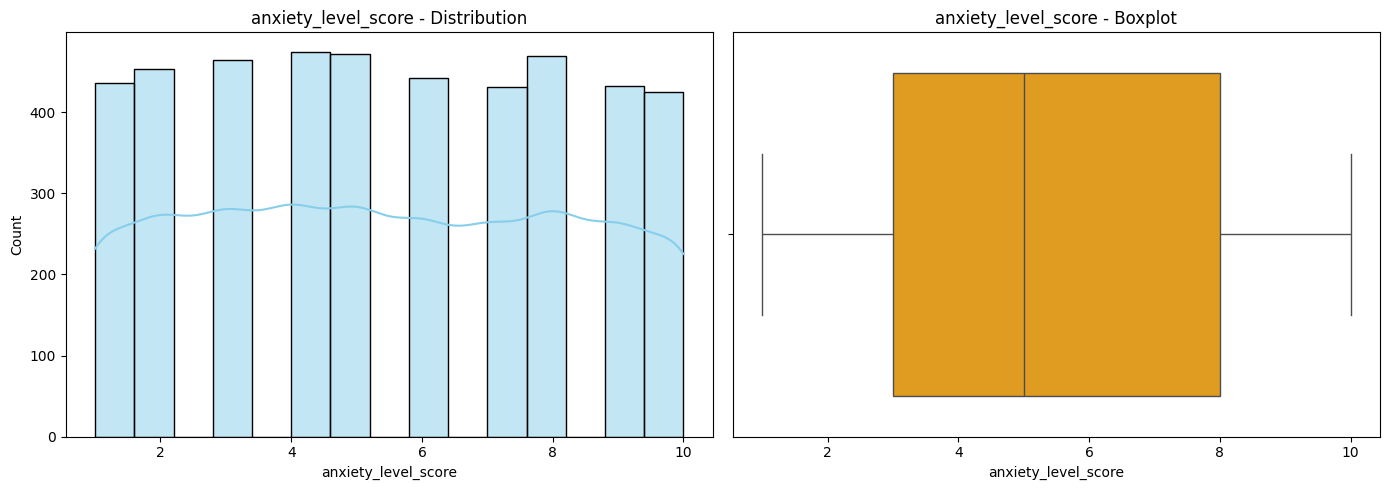

 anxiety_level_score Summary:
Mean: 5.46, Median: 5.00
Skewness: 0.03, Kurtosis: -1.21
------------------------------------------------------------


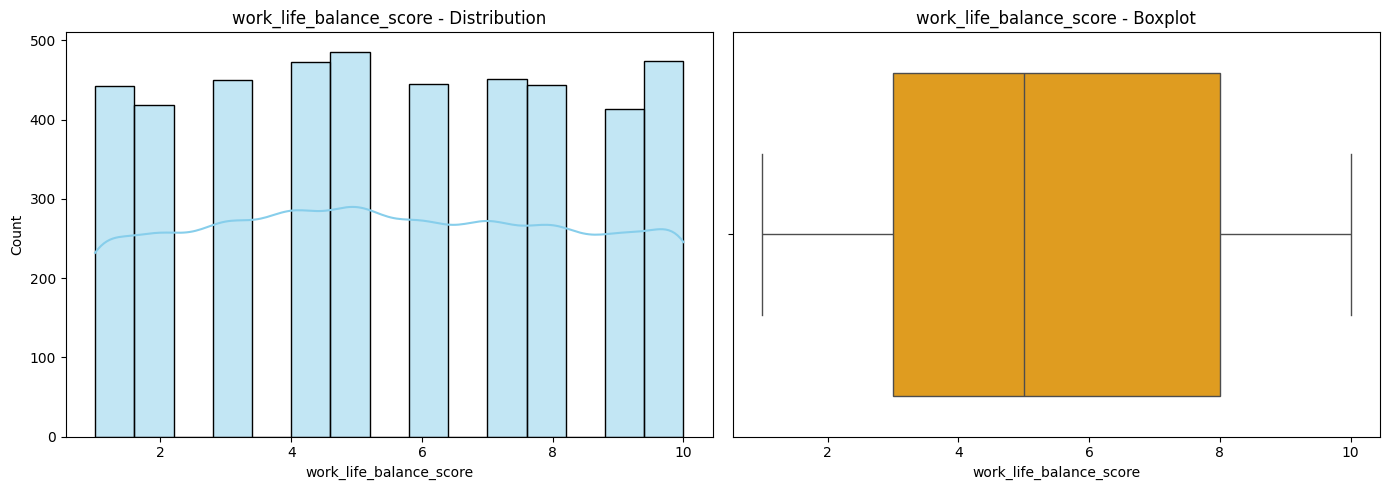

 work_life_balance_score Summary:
Mean: 5.51, Median: 5.00
Skewness: 0.01, Kurtosis: -1.19
------------------------------------------------------------


In [63]:
#  Univariate analysis of numerical columns 
num_cols = ['age', 'screen_time_hours', 'sleep_hours', 'bmi', 
            'stress_level', 'social_media_time', 
            'anxiety_level_score', 'work_life_balance_score']

for col in num_cols:
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} - Distribution')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} - Boxplot')

    plt.tight_layout()
    plt.show()

    # Skewness, Kurtosis, Mean, Median
    print(f" {col} Summary:")
    print(f"Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis():.2f}")
    print("-" * 60)



 gender - Value Counts:
gender
Male      0.4
Female    0.3
Other     0.3
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


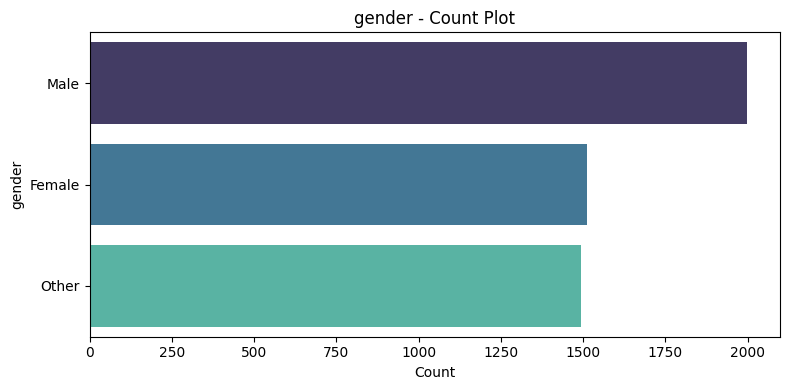


 city - Value Counts:
city
Delhi        0.25
Bangalore    0.15
Kolkata      0.15
Hyderabad    0.15
Chennai      0.15
Mumbai       0.15
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


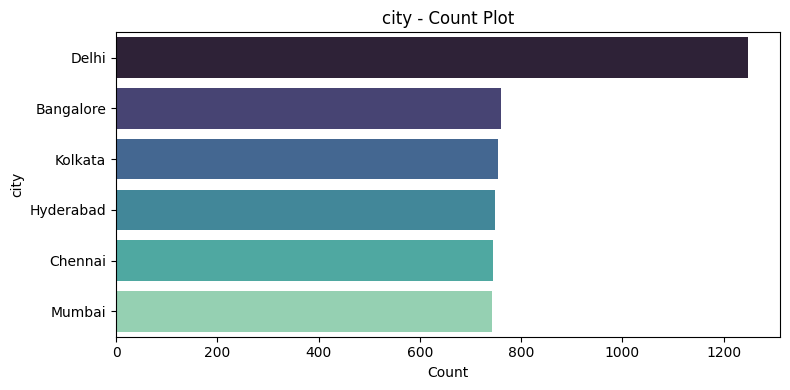


 occupation_type - Value Counts:
occupation_type
Student       0.33
Desk Job      0.23
Field Job     0.22
Freelancer    0.22
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


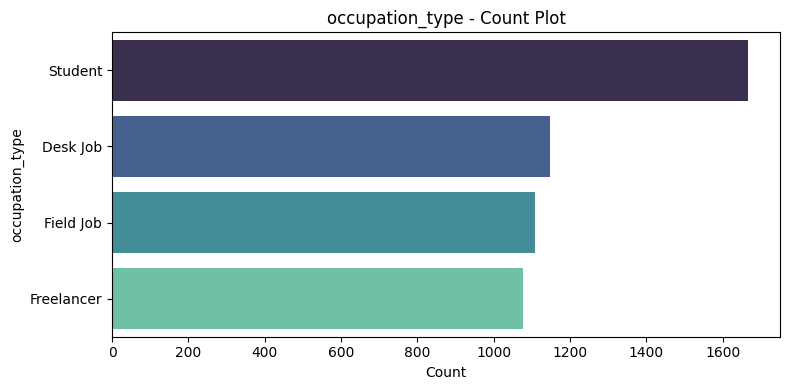


 income_bracket - Value Counts:
income_bracket
High      0.41
Medium    0.30
Low       0.29
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


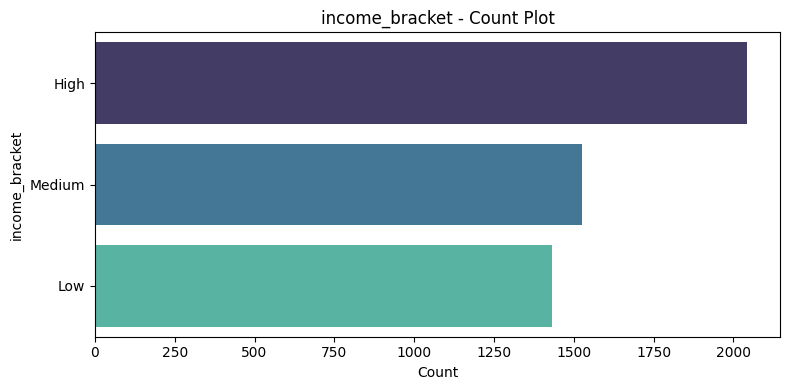


 education_level - Value Counts:
education_level
PG      0.30
UG      0.18
10th    0.18
PhD     0.17
12th    0.17
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


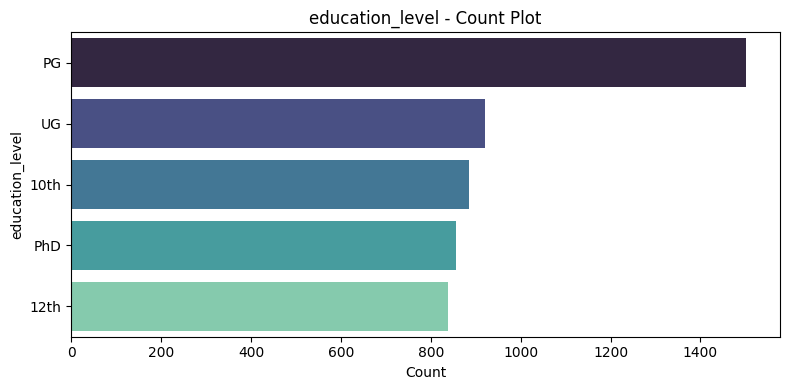


 junk_food_freq - Value Counts:
junk_food_freq
Daily     0.33
Often     0.23
Never     0.22
Rarely    0.22
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


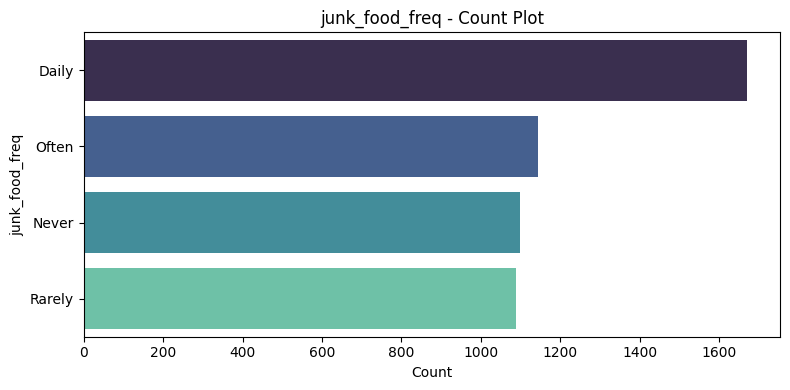


 physical_activity_level - Value Counts:
physical_activity_level
Unknown     0.33
Intense     0.23
Moderate    0.23
Light       0.22
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


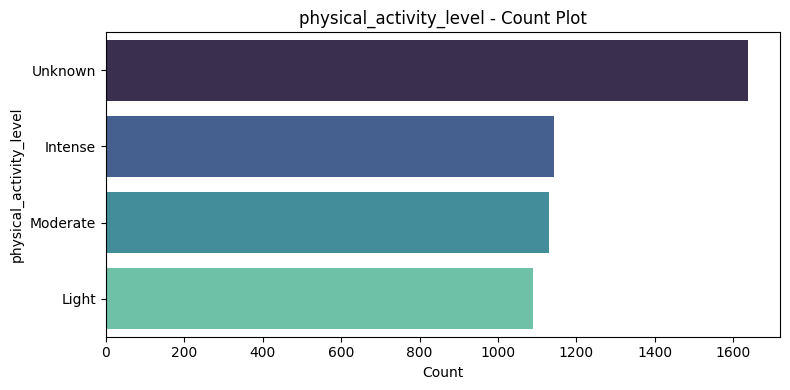


 alcohol_consumption - Value Counts:
alcohol_consumption
Never           0.42
Occasionally    0.29
Frequently      0.29
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


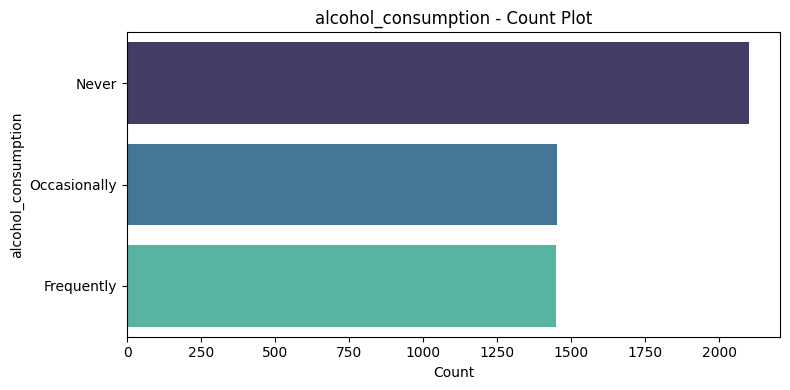


 smoking_status - Value Counts:
smoking_status
Smoker        0.56
Non-smoker    0.44
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


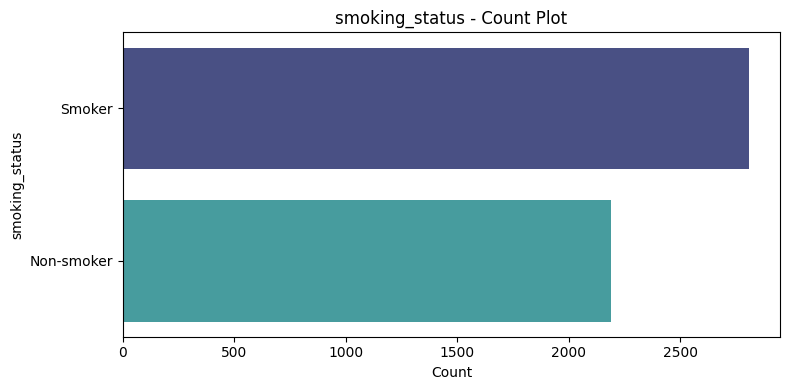


 self_rated_health - Value Counts:
self_rated_health
Excellent    0.33
Good         0.23
Average      0.22
Poor         0.22
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\2625460573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')


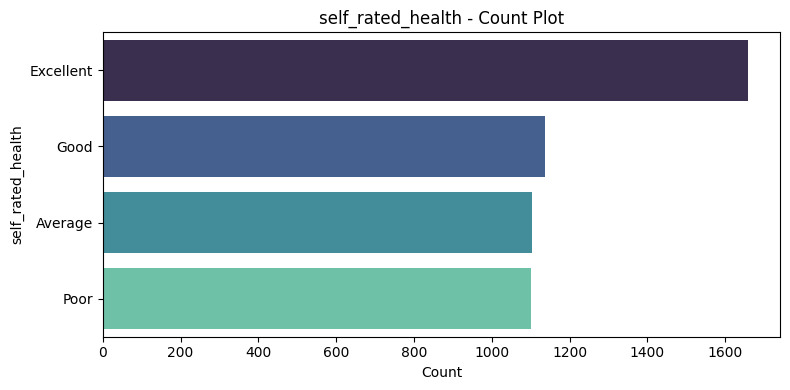

In [13]:
# Univariate Analysis of Categorical Columns
cat_cols = ['gender', 'city', 'occupation_type', 'income_bracket',
            'education_level', 'junk_food_freq', 'physical_activity_level',
            'alcohol_consumption', 'smoking_status', 'self_rated_health']

for col in cat_cols:
    print(f"\n {col} - Value Counts:")
    print(df[col].value_counts(normalize=True).round(2))  # Proportions

    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='mako')
    plt.title(f'{col} - Count Plot')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [14]:
# Bivariate Analysis
# Yahan se insights nikalne lagte hain jo real-world questions solve karte hain.
# Hum isko 3 logical parts mein divide karenge.

# 1: Numerical vs Numerical
# we will:
# Plot scatter plots to spot patterns & outliers
# Use correlation coefficients (Pearson/Spearman)
# Check non-linearity & heteroskedasticity
# Use Jensen’s inequality where applicable
from scipy.stats import pearsonr, spearmanr

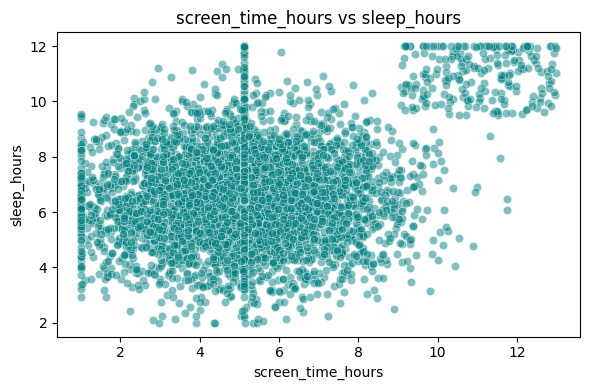

Correlation between screen_time_hours and sleep_hours:
Pearson: 0.30, Spearman: 0.14
--------------------------------------------------


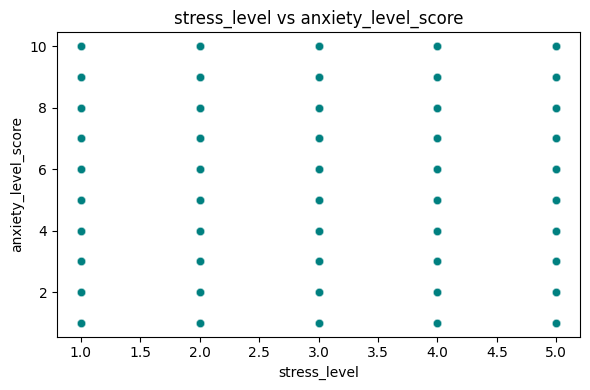

Correlation between stress_level and anxiety_level_score:
Pearson: -0.02, Spearman: -0.02
--------------------------------------------------


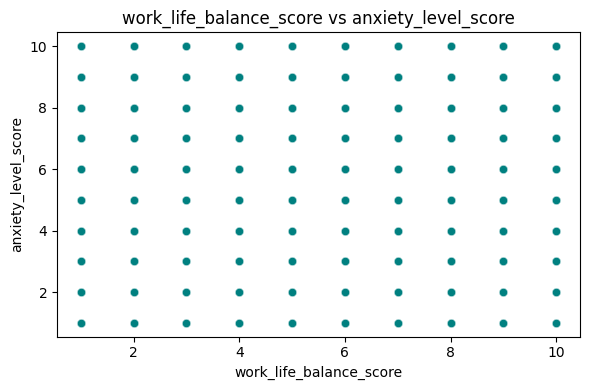

Correlation between work_life_balance_score and anxiety_level_score:
Pearson: 0.01, Spearman: 0.01
--------------------------------------------------


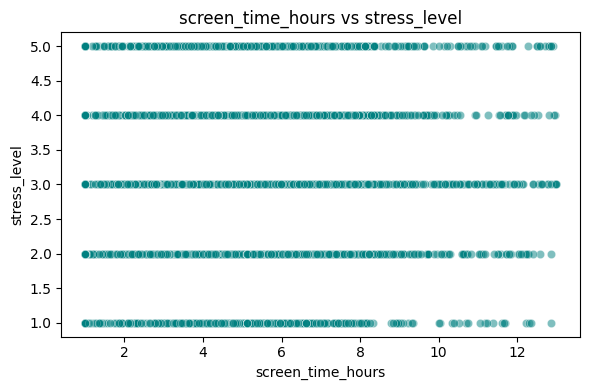

Correlation between screen_time_hours and stress_level:
Pearson: 0.00, Spearman: -0.01
--------------------------------------------------


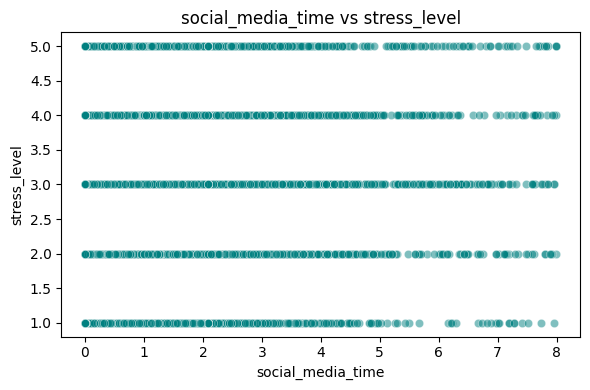

Correlation between social_media_time and stress_level:
Pearson: 0.01, Spearman: 0.01
--------------------------------------------------


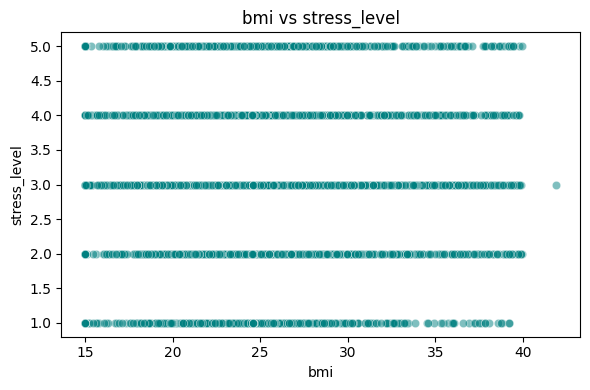

Correlation between bmi and stress_level:
Pearson: 0.00, Spearman: -0.00
--------------------------------------------------


In [15]:
num_pairs = [
    ('screen_time_hours', 'sleep_hours'),
    ('stress_level', 'anxiety_level_score'),
    ('work_life_balance_score', 'anxiety_level_score'),
    ('screen_time_hours', 'stress_level'),
    ('social_media_time', 'stress_level'),
    ('bmi', 'stress_level')
]
for x, y in num_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[x], y=df[y], alpha=0.5, color='teal')
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

    # Correlation coefficients
    pearson_corr, _ = pearsonr(df[x], df[y])
    spearman_corr, _ = spearmanr(df[x], df[y])
    
    print(f"Correlation between {x} and {y}:")
    print(f"Pearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}")
    print('-'*50)

High positive/negative correlation-----Linear relation
Spearman > Pearson-----Non-linear monotonic relation
Scattered with no trend-----No correlation or heteroskedasticity
Clusters/curves----Candidate for segmentation or transformation

In [16]:
# Categorical vs Numerical Analysis
"""Yeh step hamare liye bahut powerful hai — yahan se hum dekhte hain ki categories (like gender, occupation) 
ka impact hota hai ya nahi on numerical health and behavior factors like BMI, stress, anxiety, etc."""

'''
# Compare mean/median differences across categories
# Use boxplots for visual comparison
# Apply statistical tests (t-test, ANOVA) if needed
# Handle imbalanced categories carefully'''

'\n# Compare mean/median differences across categories\n# Use boxplots for visual comparison\n# Apply statistical tests (t-test, ANOVA) if needed\n# Handle imbalanced categories carefully'


 Group Stats for bmi by gender:
         count       mean       std   min        25%        50%        75%  \
gender                                                                       
Female  1510.0  25.194558  5.003012  15.0  21.938302  24.607727  27.473363   
Male    1998.0  25.135373  4.906522  15.0  21.972002  24.607727  27.461347   
Other   1492.0  25.312757  5.025412  15.0  22.070826  24.607727  27.532758   

              max  
gender             
Female  41.916337  
Male    39.974488  
Other   39.949041  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


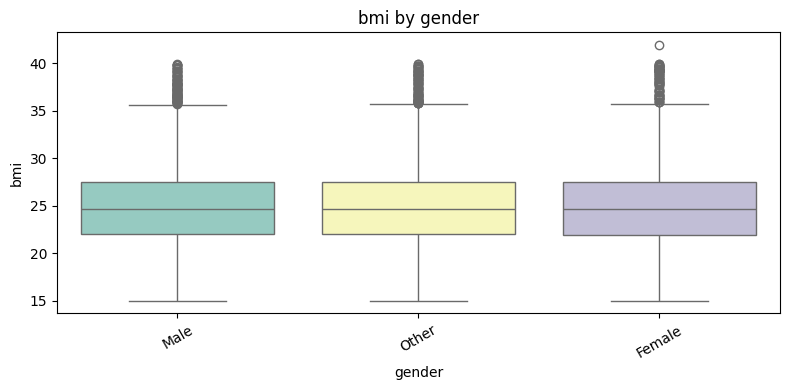


 Group Stats for stress_level by gender:
         count      mean       std  min  25%  50%  75%  max
gender                                                     
Female  1510.0  3.103311  1.172324  1.0  2.0  3.0  4.0  5.0
Male    1998.0  3.112613  1.186990  1.0  2.0  3.0  4.0  5.0
Other   1492.0  3.167560  1.191888  1.0  2.0  3.0  4.0  5.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


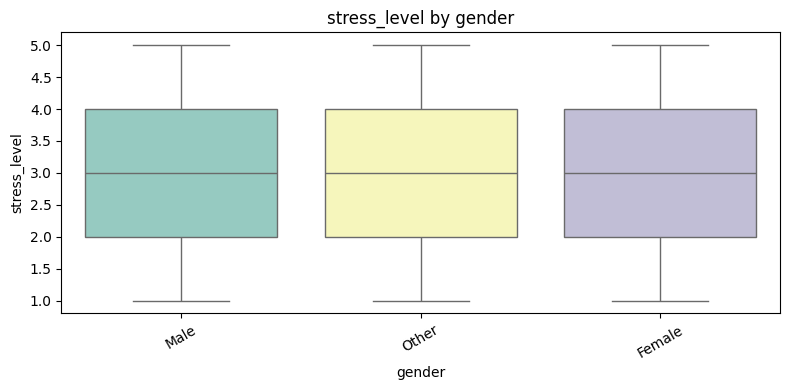


 Group Stats for screen_time_hours by income_bracket:
                 count      mean       std  min       25%       50%       75%  \
income_bracket                                                                  
High            2044.0  5.288473  2.158401  1.0  3.994054  5.115316  6.332426   
Low             1431.0  5.300699  2.198110  1.0  3.915025  5.115316  6.378435   
Medium          1525.0  5.251168  2.181484  1.0  3.901523  5.115316  6.314642   

                      max  
income_bracket             
High            12.994592  
Low             12.967498  
Medium          12.868064  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


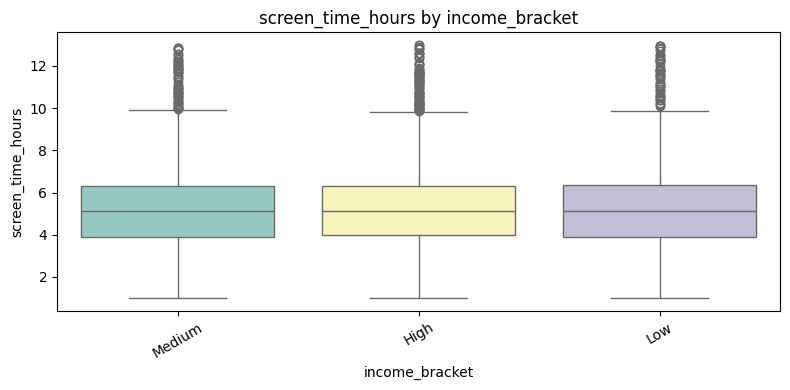


 Group Stats for anxiety_level_score by occupation_type:
                  count      mean       std  min  25%  50%  75%   max
occupation_type                                                      
Desk Job         1148.0  5.548780  2.859736  1.0  3.0  6.0  8.0  10.0
Field Job        1109.0  5.421100  2.822413  1.0  3.0  5.0  8.0  10.0
Freelancer       1076.0  5.421933  2.876115  1.0  3.0  5.0  8.0  10.0
Student          1667.0  5.466707  2.851560  1.0  3.0  5.0  8.0  10.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


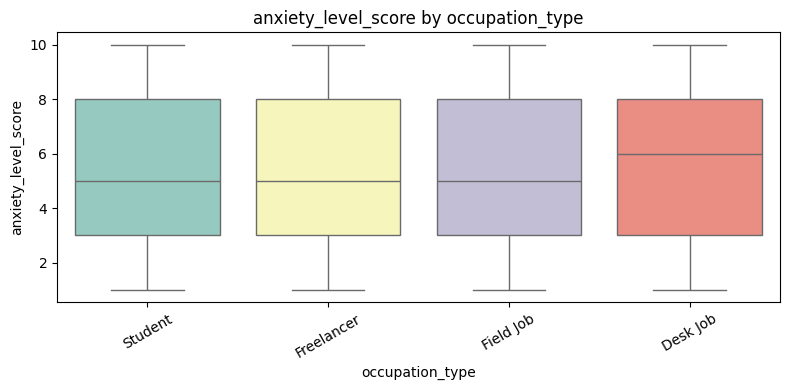


 Group Stats for stress_level by physical_activity_level:
                          count      mean       std  min  25%  50%  75%  max
physical_activity_level                                                     
Intense                  1144.0  3.116259  1.183710  1.0  2.0  3.0  4.0  5.0
Light                    1088.0  3.103860  1.185338  1.0  2.0  3.0  4.0  5.0
Moderate                 1131.0  3.143236  1.189480  1.0  2.0  3.0  4.0  5.0
Unknown                  1637.0  3.136225  1.180688  1.0  2.0  3.0  4.0  5.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


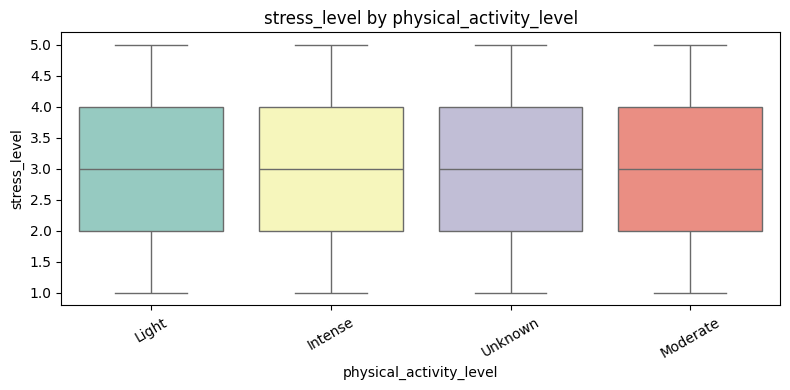


 Group Stats for work_life_balance_score by education_level:
                  count      mean       std  min  25%  50%  75%   max
education_level                                                      
10th              884.0  5.441176  2.830817  1.0  3.0  5.0  8.0  10.0
12th              838.0  5.599045  2.909483  1.0  3.0  6.0  8.0  10.0
PG               1502.0  5.404794  2.853272  1.0  3.0  5.0  8.0  10.0
PhD               856.0  5.515187  2.890558  1.0  3.0  5.0  8.0  10.0
UG                920.0  5.663043  2.859332  1.0  3.0  6.0  8.0  10.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


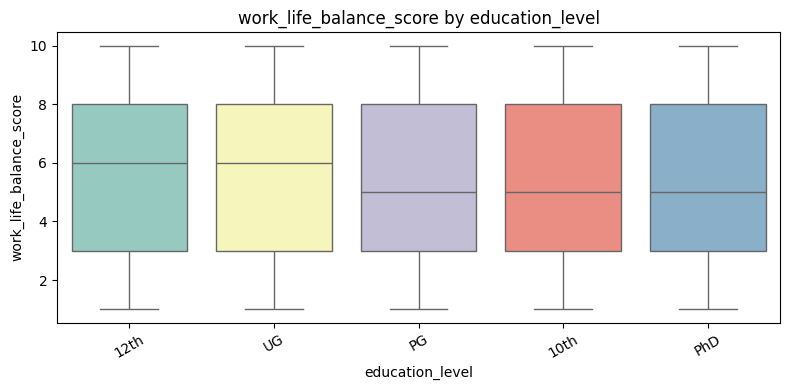


 Group Stats for bmi by smoking_status:
                 count       mean       std   min        25%        50%  \
smoking_status                                                            
Non-smoker      2192.0  25.101233  4.905040  15.0  21.902778  24.607727   
Smoker          2808.0  25.288101  5.021188  15.0  22.091728  24.607727   

                      75%        max  
smoking_status                        
Non-smoker      27.398386  39.974488  
Smoker          27.574388  41.916337  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3447226215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set3')


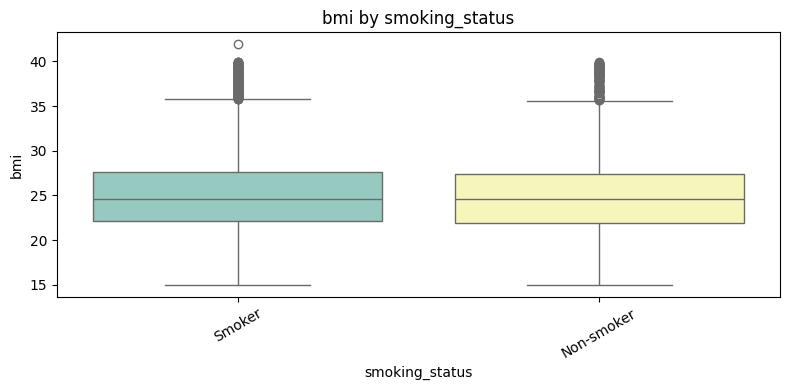

In [17]:
cat_num_pairs = [
    ('gender', 'bmi'),
    ('gender', 'stress_level'),
    ('income_bracket', 'screen_time_hours'),
    ('occupation_type', 'anxiety_level_score'),
    ('physical_activity_level', 'stress_level'),
    ('education_level', 'work_life_balance_score'),
    ('smoking_status', 'bmi')
]

for cat, num in cat_num_pairs:
    print(f"\n Group Stats for {num} by {cat}:")
    print(df.groupby(cat)[num].describe())

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat, y=num, data=df, palette='Set3')
    plt.title(f'{num} by {cat}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [18]:
# (Advanced): Add Statistical Testing

'''Yeh wo jagah hai jahan aap EDA + Statistical Testing ko mix kar ke real insights nikalte ho.
Hum har pair ke liye check karenge kitni categories hain, aur uske basis pe:

2 groups ➤ T-Test (Independent)

2 groups ➤ ANOVA (F-test)'''

'Yeh wo jagah hai jahan aap EDA + Statistical Testing ko mix kar ke real insights nikalte ho.\nHum har pair ke liye check karenge kitni categories hain, aur uske basis pe:\n\n2 groups ➤ T-Test (Independent)\n\n2 groups ➤ ANOVA (F-test)'

In [19]:
from scipy.stats import ttest_ind, f_oneway


 bmi by gender:
         count       mean       std   min        25%        50%        75%  \
gender                                                                       
Female  1510.0  25.194558  5.003012  15.0  21.938302  24.607727  27.473363   
Male    1998.0  25.135373  4.906522  15.0  21.972002  24.607727  27.461347   
Other   1492.0  25.312757  5.025412  15.0  22.070826  24.607727  27.532758   

              max  
gender             
Female  41.916337  
Male    39.974488  
Other   39.949041  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


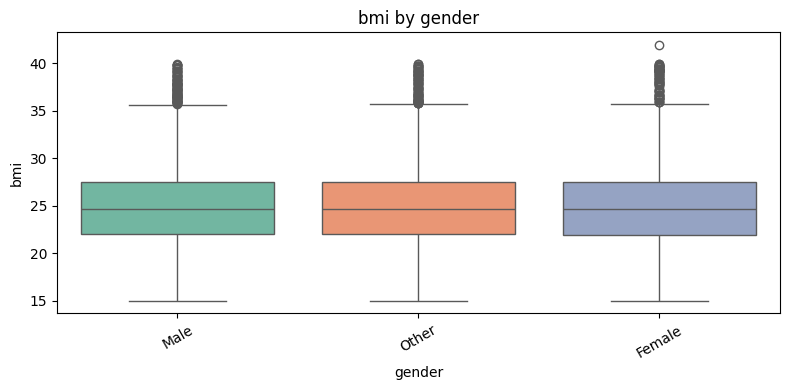

ANOVA across 3 groups: p-value = 0.5772
------------------------------------------------------------

 stress_level by gender:
         count      mean       std  min  25%  50%  75%  max
gender                                                     
Female  1510.0  3.103311  1.172324  1.0  2.0  3.0  4.0  5.0
Male    1998.0  3.112613  1.186990  1.0  2.0  3.0  4.0  5.0
Other   1492.0  3.167560  1.191888  1.0  2.0  3.0  4.0  5.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


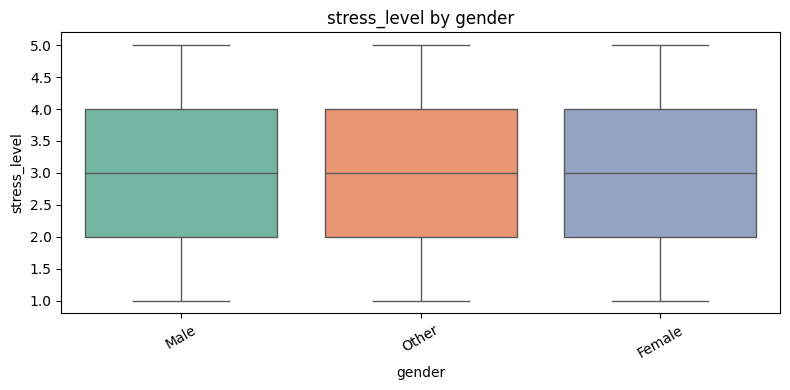

ANOVA across 3 groups: p-value = 0.2662
------------------------------------------------------------

 screen_time_hours by income_bracket:
                 count      mean       std  min       25%       50%       75%  \
income_bracket                                                                  
High            2044.0  5.288473  2.158401  1.0  3.994054  5.115316  6.332426   
Low             1431.0  5.300699  2.198110  1.0  3.915025  5.115316  6.378435   
Medium          1525.0  5.251168  2.181484  1.0  3.901523  5.115316  6.314642   

                      max  
income_bracket             
High            12.994592  
Low             12.967498  
Medium          12.868064  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


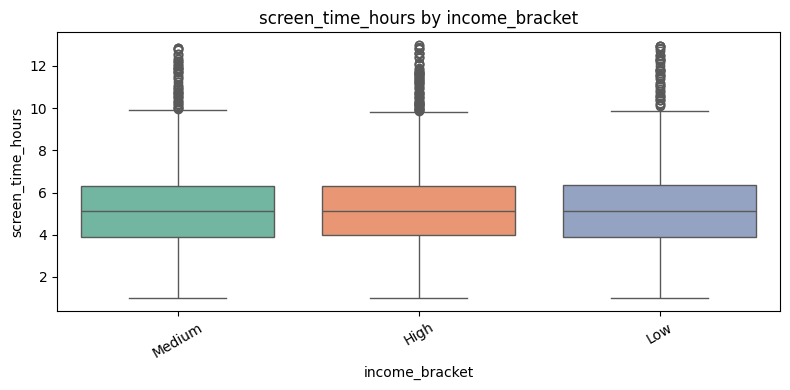

ANOVA across 3 groups: p-value = 0.8076
------------------------------------------------------------

 anxiety_level_score by occupation_type:
                  count      mean       std  min  25%  50%  75%   max
occupation_type                                                      
Desk Job         1148.0  5.548780  2.859736  1.0  3.0  6.0  8.0  10.0
Field Job        1109.0  5.421100  2.822413  1.0  3.0  5.0  8.0  10.0
Freelancer       1076.0  5.421933  2.876115  1.0  3.0  5.0  8.0  10.0
Student          1667.0  5.466707  2.851560  1.0  3.0  5.0  8.0  10.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


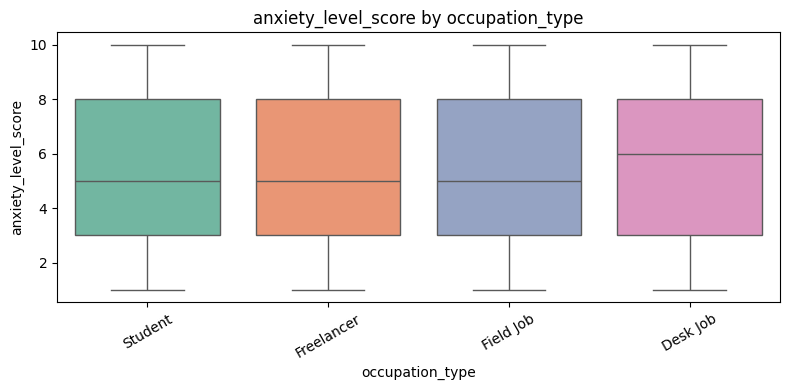

ANOVA across 4 groups: p-value = 0.6826
------------------------------------------------------------

 stress_level by physical_activity_level:
                          count      mean       std  min  25%  50%  75%  max
physical_activity_level                                                     
Intense                  1144.0  3.116259  1.183710  1.0  2.0  3.0  4.0  5.0
Light                    1088.0  3.103860  1.185338  1.0  2.0  3.0  4.0  5.0
Moderate                 1131.0  3.143236  1.189480  1.0  2.0  3.0  4.0  5.0
Unknown                  1637.0  3.136225  1.180688  1.0  2.0  3.0  4.0  5.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


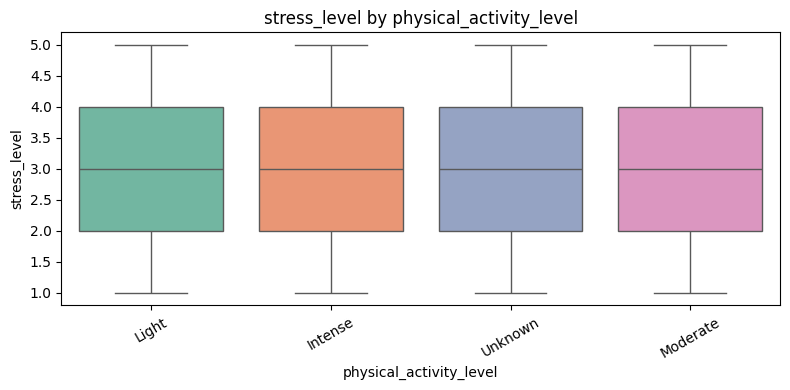

ANOVA across 4 groups: p-value = 0.8449
------------------------------------------------------------

 work_life_balance_score by education_level:
                  count      mean       std  min  25%  50%  75%   max
education_level                                                      
10th              884.0  5.441176  2.830817  1.0  3.0  5.0  8.0  10.0
12th              838.0  5.599045  2.909483  1.0  3.0  6.0  8.0  10.0
PG               1502.0  5.404794  2.853272  1.0  3.0  5.0  8.0  10.0
PhD               856.0  5.515187  2.890558  1.0  3.0  5.0  8.0  10.0
UG                920.0  5.663043  2.859332  1.0  3.0  6.0  8.0  10.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


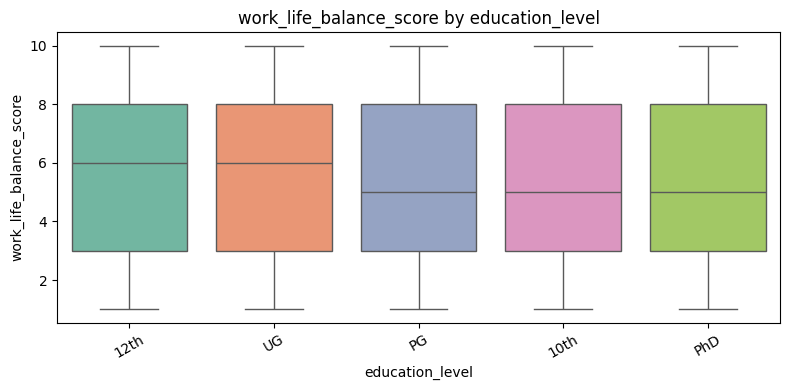

ANOVA across 5 groups: p-value = 0.2018
------------------------------------------------------------

 bmi by smoking_status:
                 count       mean       std   min        25%        50%  \
smoking_status                                                            
Non-smoker      2192.0  25.101233  4.905040  15.0  21.902778  24.607727   
Smoker          2808.0  25.288101  5.021188  15.0  22.091728  24.607727   

                      75%        max  
smoking_status                        
Non-smoker      27.398386  39.974488  
Smoker          27.574388  41.916337  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4944\3894973727.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Set2')


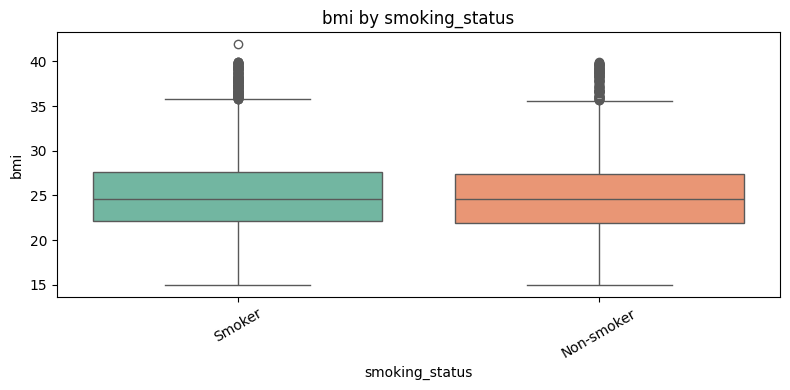

T-Test between Smoker and Non-smoker: p-value = 0.1872
------------------------------------------------------------


In [20]:
cat_num_pairs = [
    ('gender', 'bmi'),
    ('gender', 'stress_level'),
    ('income_bracket', 'screen_time_hours'),
    ('occupation_type', 'anxiety_level_score'),
    ('physical_activity_level', 'stress_level'),
    ('education_level', 'work_life_balance_score'),
    ('smoking_status', 'bmi')
]
for cat, num in cat_num_pairs:
    print(f"\n {num} by {cat}:")

    # Summary statistics
    summary = df.groupby(cat)[num].describe()
    print(summary)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cat, y=num, data=df, palette='Set2')
    plt.title(f'{num} by {cat}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # Drop NA
    sub_df = df[[cat, num]].dropna()

    # Statistical test
    groups = sub_df[cat].unique()
    if len(groups) == 2:
        # T-Test
        g1 = sub_df[sub_df[cat] == groups[0]][num]
        g2 = sub_df[sub_df[cat] == groups[1]][num]
        stat, pval = ttest_ind(g1, g2)
        print(f"T-Test between {groups[0]} and {groups[1]}: p-value = {pval:.4f}")
    elif len(groups) > 2:
        # ANOVA
        samples = [sub_df[sub_df[cat] == group][num] for group in groups]
        stat, pval = f_oneway(*samples)
        print(f"ANOVA across {len(groups)} groups: p-value = {pval:.4f}")
    else:
        print("Not enough groups for testing.")
    
    print("-" * 60)

In [21]:
'''p-value	Meaning:
< 0.05	---    Statistically significant difference among groups
>= 0.05	 ---   No significant difference — might not be a strong predictor'''

'p-value\tMeaning:\n< 0.05\t---    Statistically significant difference among groups\n>= 0.05\t ---   No significant difference — might not be a strong predictor'

In [22]:
# Categorical vs Categorical Analysis
'''
Yeh part hume help karta hai samajhne mein:
Kya 2 categories ke beech association hai ya nahi?
Is there any dependency or are they independent?'''

'''
Goals:
Create contingency tables
Perform Chi-Square Test of Independence
Visualize using stacked bar charts or heatmaps'''

'\nGoals:\nCreate contingency tables\nPerform Chi-Square Test of Independence\nVisualize using stacked bar charts or heatmaps'

In [23]:
from scipy.stats import chi2_contingency


 Chi-Square Test: gender vs smoking_status
Contingency Table:
smoking_status  Non-smoker  Smoker
gender                            
Female                 689     821
Male                   861    1137
Other                  642     850
Chi2 Statistic: 2.81, p-value: 0.2449
Degrees of Freedom: 2
 Variables are likely independent.


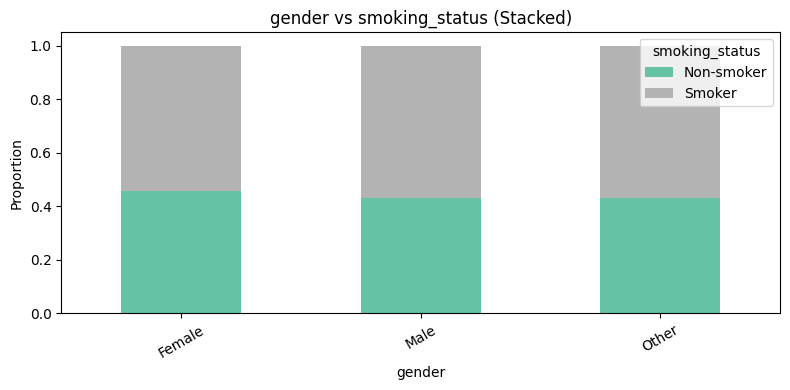

------------------------------------------------------------

 Chi-Square Test: gender vs alcohol_consumption
Contingency Table:
alcohol_consumption  Frequently  Never  Occasionally
gender                                              
Female                      433    636           441
Male                        591    829           578
Other                       423    635           434
Chi2 Statistic: 0.76, p-value: 0.9437
Degrees of Freedom: 4
 Variables are likely independent.


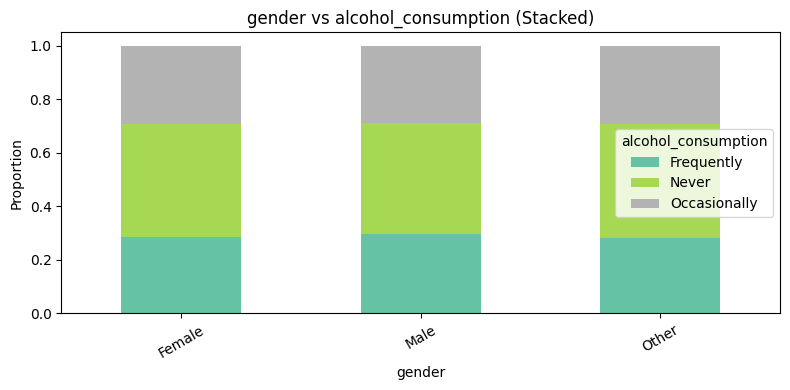

------------------------------------------------------------

 Chi-Square Test: occupation_type vs physical_activity_level
Contingency Table:
physical_activity_level  Intense  Light  Moderate  Unknown
occupation_type                                           
Desk Job                     247    265       258      378
Field Job                    253    251       247      358
Freelancer                   244    218       238      376
Student                      400    354       388      525
Chi2 Statistic: 7.47, p-value: 0.5879
Degrees of Freedom: 9
 Variables are likely independent.


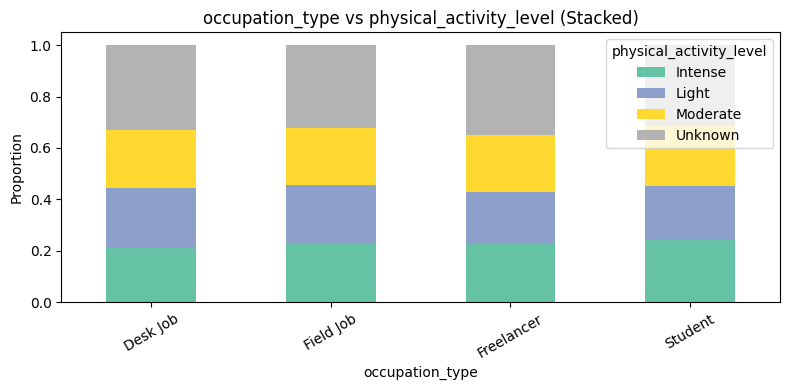

------------------------------------------------------------

 Chi-Square Test: income_bracket vs chronic_disease_flag
Contingency Table:
chronic_disease_flag     0    1
income_bracket                 
High                  1671  373
Low                   1130  301
Medium                1219  306
Chi2 Statistic: 4.45, p-value: 0.1082
Degrees of Freedom: 2
 Variables are likely independent.


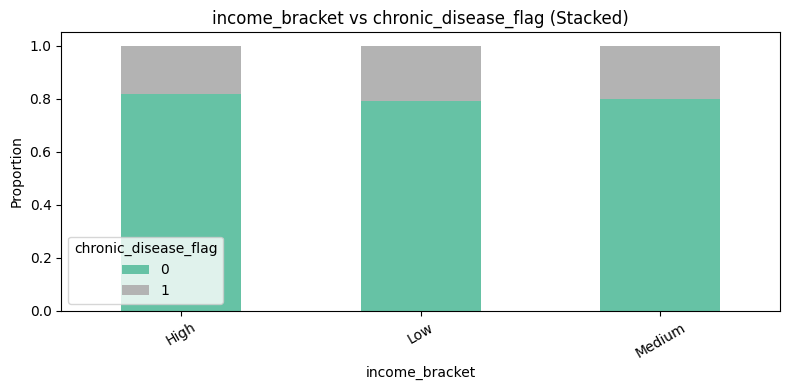

------------------------------------------------------------

 Chi-Square Test: city vs diabetic_flag
Contingency Table:
diabetic_flag     0    1
city                    
Bangalore       688   73
Chennai         660   84
Delhi          1110  139
Hyderabad       686   62
Kolkata         668   87
Mumbai          677   66
Chi2 Statistic: 8.27, p-value: 0.1422
Degrees of Freedom: 5
 Variables are likely independent.


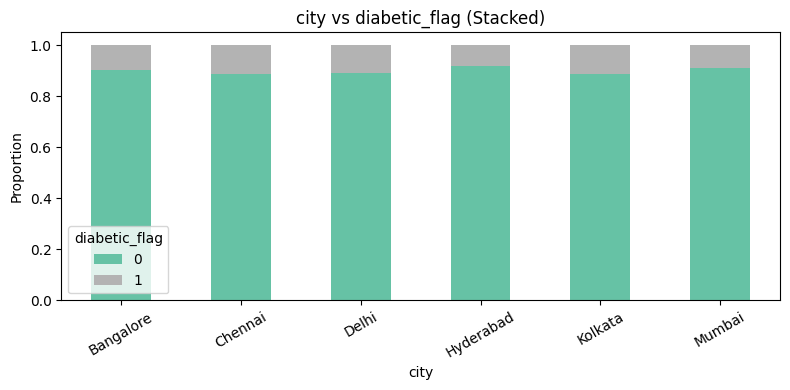

------------------------------------------------------------

 Chi-Square Test: family_history_disease vs chronic_disease_flag
Contingency Table:
chronic_disease_flag       0    1
family_history_disease           
0                       2808  683
1                       1212  297
Chi2 Statistic: 0.00, p-value: 0.9544
Degrees of Freedom: 1
 Variables are likely independent.


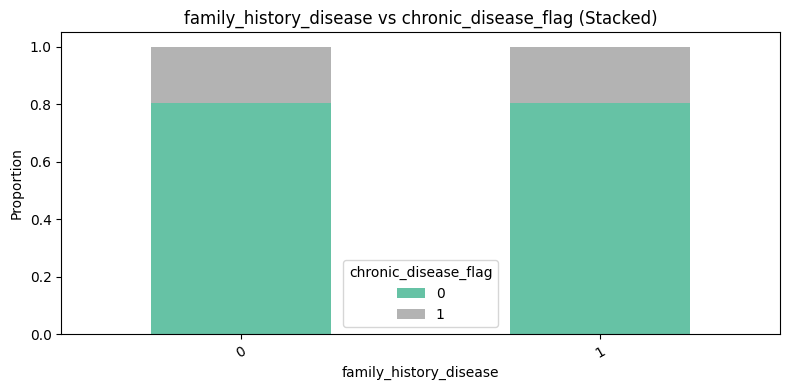

------------------------------------------------------------


In [24]:
cat_cat_pairs = [
    ('gender', 'smoking_status'),
    ('gender', 'alcohol_consumption'),
    ('occupation_type', 'physical_activity_level'),
    ('income_bracket', 'chronic_disease_flag'),
    ('city', 'diabetic_flag'),
    ('family_history_disease', 'chronic_disease_flag')
]

for col1, col2 in cat_cat_pairs:
    print(f"\n Chi-Square Test: {col1} vs {col2}")
    
    # Contingency Table
    contingency = pd.crosstab(df[col1], df[col2])
    print("Contingency Table:")
    print(contingency)

    # Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    if p < 0.05:
        print(" Variables are likely dependent (association exists).")
    else:
        print(" Variables are likely independent.")
    
    # Plot
    contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
    contingency_norm.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set2')
    plt.title(f'{col1} vs {col2} (Stacked)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    print("-" * 60)

In [25]:
'''
High p-value --- Categories are likely independent
Low p-value	--- Association exists between the two categorical features
Skewed stacked bar	--- Visual clue of imbalance'''

'\nHigh p-value --- Categories are likely independent\nLow p-value\t--- Association exists between the two categorical features\nSkewed stacked bar\t--- Visual clue of imbalance'

In [26]:
# Correlation Matrix + Causation Exploration

'''
1.Numerical variables ke beech linear correlation
2.Multicollinearity detect karna
3.Use Pearson correlation
4.Use Spearman (if data is not normally distributed)
5.Causation ke clues dhoondhna (based on domain + common sense)'''

'\n1.Numerical variables ke beech linear correlation\n2.Multicollinearity detect karna\n3.Use Pearson correlation\n4.Use Spearman (if data is not normally distributed)\n5.Causation ke clues dhoondhna (based on domain + common sense)'

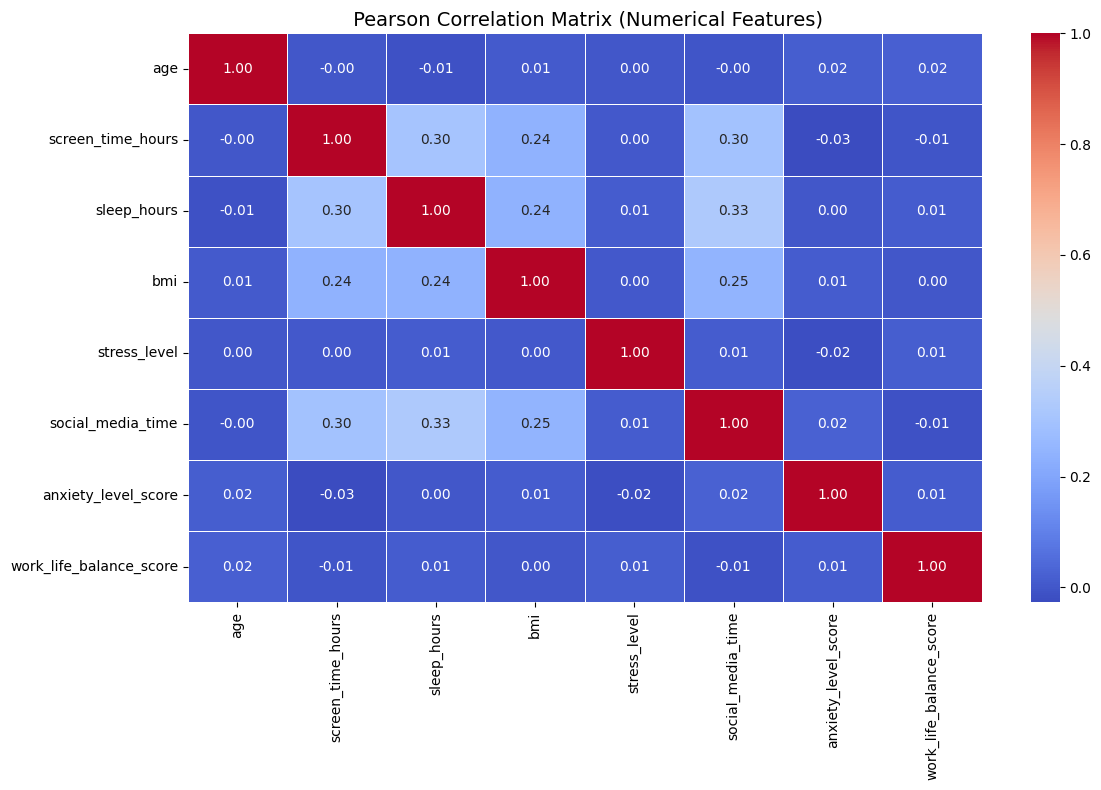

In [27]:
#  1. Correlation Matrix (Pearson)

plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(' Pearson Correlation Matrix (Numerical Features)', fontsize=14)
plt.tight_layout()
plt.show()

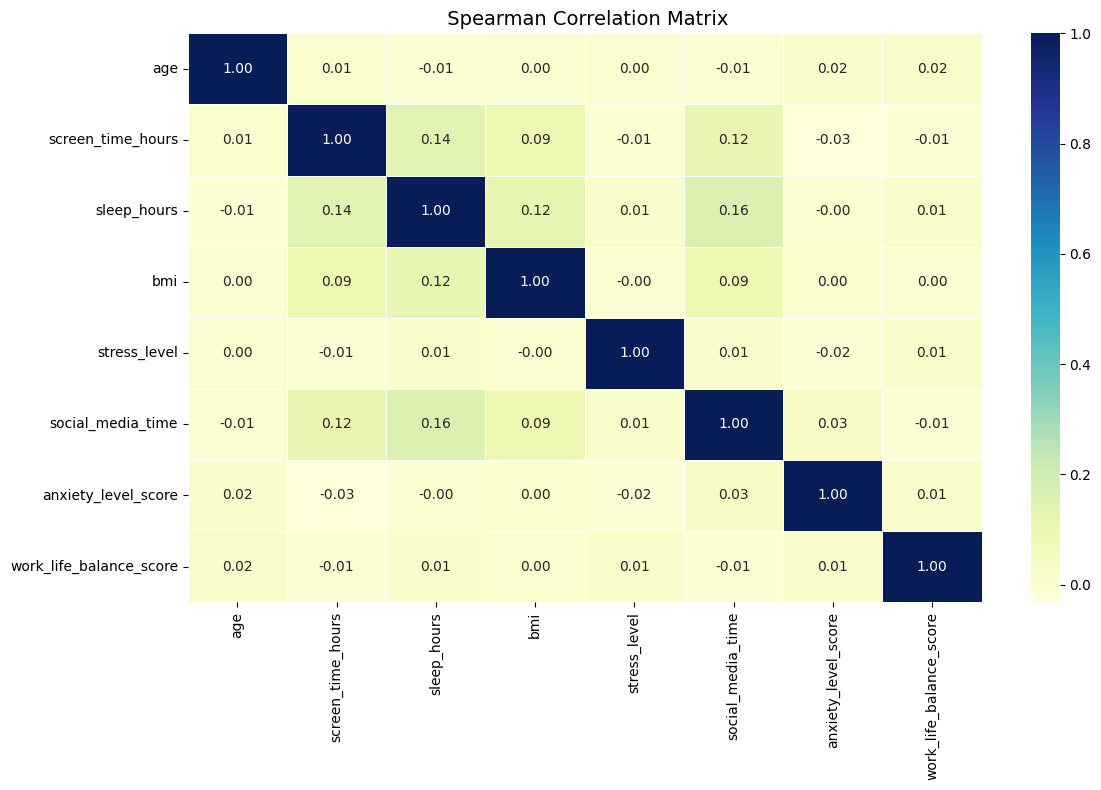

In [28]:
#  2. Spearman Correlation Matrix (if non-normal)

plt.figure(figsize=(12, 8))
spearman_corr = df[num_cols].corr(method='spearman')

sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title(' Spearman Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
'''
Correlation Coefficient      	Strength
0.7 to 1.0	                    Strong Positive
0.4 to 0.69	                    Moderate Positive
0.1 to 0.39	                    Weak Positive
0.0	                            No Correlation
-0.1 to -0.39	                Weak Negative
-0.4 to -0.69	                Moderate Negative
-0.7 to -1.0	                Strong Negative'''

'\nCorrelation Coefficient      \tStrength\n0.7 to 1.0\t                    Strong Positive\n0.4 to 0.69\t                    Moderate Positive\n0.1 to 0.39\t                    Weak Positive\n0.0\t                            No Correlation\n-0.1 to -0.39\t                Weak Negative\n-0.4 to -0.69\t                Moderate Negative\n-0.7 to -1.0\t                Strong Negative'

In [30]:
''' What are Outliers?
Outliers are extreme values that don’t fit the pattern of the rest of the data.

For example:

A person sleeping 2 hours/day or 18 hours/day

Stress score = 99 when most scores are < 60

Why care?
Outliers can:

Mess up mean/standard deviation

Affect correlations, regression lines, and hypothesis tests'''

' What are Outliers?\nOutliers are extreme values that don’t fit the pattern of the rest of the data.\n\nFor example:\n\nA person sleeping 2 hours/day or 18 hours/day\n\nStress score = 99 when most scores are < 60\n\nWhy care?\nOutliers can:\n\nMess up mean/standard deviation\n\nAffect correlations, regression lines, and hypothesis tests'

In [31]:
# Z-Score Method (Step-by-step)
# Z-Score tells how far a value is from the mean in standard deviation units.

from scipy.stats import zscore
# Calculate Z-Scores
z_scores = df[num_cols].apply(zscore)

In [32]:
# Flag values where Z-Score > 3 or < -3
outliers_z = (z_scores.abs() > 3).sum()
print("Z-Score Outliers Count:")
print(outliers_z.sort_values(ascending=False))
# This gives you a sense of which columns have too many outliers.

Z-Score Outliers Count:
social_media_time          80
screen_time_hours          62
bmi                         1
age                         0
sleep_hours                 0
stress_level                0
anxiety_level_score         0
work_life_balance_score     0
dtype: int64


In [33]:
# Outlier Detection Using IQR Method
# This method is better than Z-score when data is non-normal or has skewness — like most real-world data.
'''
What is IQR?
Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 − Q1

Outlier Condition:

Anything < Q1 − 1.5 × IQR

OR > Q3 + 1.5 × IQR'''

'\nWhat is IQR?\nQ1 = 25th percentile\n\nQ3 = 75th percentile\n\nIQR = Q3 − Q1\n\nOutlier Condition:\n\nAnything < Q1 − 1.5 × IQR\n\nOR > Q3 + 1.5 × IQR'

In [34]:
#  Define a function to count IQR-based outliers:
def iqr_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()

In [35]:
# Apply on all numerical columns:
iqr_counts = {col: iqr_outliers(col) for col in num_cols}
iqr_outlier_df = pd.Series(iqr_counts).sort_values(ascending=False)

print("IQR-Based Outlier Count:")
print(iqr_outlier_df)

IQR-Based Outlier Count:
bmi                        248
social_media_time          198
screen_time_hours          193
sleep_hours                148
age                          0
stress_level                 0
anxiety_level_score          0
work_life_balance_score      0
dtype: int64


In [36]:
'''
Option	                        Action
Small number of outliers	    Remove or Winsorize
Large number	                Use robust methods (log transform, binning, etc.)
Influential outliers	        Handle separately (maybe case studies)'''

'\nOption\t                        Action\nSmall number of outliers\t    Remove or Winsorize\nLarge number\t                Use robust methods (log transform, binning, etc.)\nInfluential outliers\t        Handle separately (maybe case studies)'

In [37]:
# Outlier Handling Techniques

'''
Ab jo outliers detect hue using Z-Score ya IQR, unko hum:
Remove (if very few)
Cap/Clip (if large but extreme)
Transform (if you want to reduce skewness)'''

'\nAb jo outliers detect hue using Z-Score ya IQR, unko hum:\nRemove (if very few)\nCap/Clip (if large but extreme)\nTransform (if you want to reduce skewness)'

In [38]:
#  1. Remove Outliers (only if < 2–3%)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [39]:
df.shape

(4500, 24)

In [40]:
# 2. Capping (Winsorization)
# Keep outliers but pull them toward a limit.

for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [41]:
df.shape

(4500, 24)

###  Feature Engineering

In [42]:
'''
1.Improve model interpretability
2.Encode hidden patterns
3.Make statistical testing more meaningful'''

'\n1.Improve model interpretability\n2.Encode hidden patterns\n3.Make statistical testing more meaningful'

In [43]:
# Binning / Categorizing Numerical Features
'''
Useful when you want to:
---Prepare for Chi-Square tests
---Explore non-linear trends
---Segment population meaningfully'''

'\nUseful when you want to:\n---Prepare for Chi-Square tests\n---Explore non-linear trends\n---Segment population meaningfully'

In [44]:
# Age Bins
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18–25', '26–35', '36–45', '46–60', '60+'])

# Sleep Hours Bins
df['sleep_category'] = pd.cut(df['sleep_hours'], 
                              bins=[0, 4, 6, 8, 12], 
                              labels=['Very Low', 'Low', 'Healthy', 'Excessive'])

# BMI Categories (WHO standard-like)
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [45]:
# Flag Features
# Binary columns that reveal quick insights.

In [46]:
# Long screen time flag
df['long_screen_time_flag'] = df['screen_time_hours'].apply(lambda x: 1 if x > 6 else 0)

# Unhealthy lifestyle flag
df['unhealthy_flag'] = ((df['junk_food_freq'] == 'Daily') | 
                        (df['physical_activity_level'] == 'Low')).astype(int)


In [47]:
# Interaction Features 
# Reveal combined effects (non-linear patterns).

# Screen time * Sleep quality interaction
df['stress_screen_sleep'] = df['screen_time_hours'] * df['sleep_hours']

# BMI and physical activity interaction
df['bmi_physical_combo'] = df['bmi'] / (df['physical_activity_level'].map({'Low':1, 'Moderate':2, 'High':3}))



In [48]:
'''
Technique	         Why?
Binning	             Enables categorical analysis
Flags	             Quick diagnostic binary fields
Interactions	     Capture real-world synergy'''

'\nTechnique\t         Why?\nBinning\t             Enables categorical analysis\nFlags\t             Quick diagnostic binary fields\nInteractions\t     Capture real-world synergy'

###  Statistical Testing Phase

In [49]:
'''
To run statistical tests to check relationships, differences, and dependencies using:

  Test Type	               Use Case
T-test	                   Compare means (e.g., stress in male vs female)
Chi-Square	               Test independence (e.g., gender vs smoking status)
ANOVA	                   Compare means across >2 groups (e.g., BMI by city)
Correlation Test	       Numerical association
Logistic Regression Prep   Binary outcomes
Bayesian Estimate	       Uncertainty & inference
CLT Simulation	           Sampling theory in practice'''

'\nTo run statistical tests to check relationships, differences, and dependencies using:\n\n  Test Type\t               Use Case\nT-test\t                   Compare means (e.g., stress in male vs female)\nChi-Square\t               Test independence (e.g., gender vs smoking status)\nANOVA\t                   Compare means across >2 groups (e.g., BMI by city)\nCorrelation Test\t       Numerical association\nLogistic Regression Prep   Binary outcomes\nBayesian Estimate\t       Uncertainty & inference\nCLT Simulation\t           Sampling theory in practice'

In [50]:
# T-Test (Independent Samples)
'''Q: Is average stress level different between males and females?'''

from scipy.stats import ttest_ind

male_stress = df[df['gender'] == 'Male']['stress_level']
female_stress = df[df['gender'] == 'Female']['stress_level']

t_stat, p_value = ttest_ind(male_stress, female_stress, nan_policy='omit')

print(f"T-Test: Male vs Female Stress")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in stress levels between genders.")
else:
    print("No significant difference.")


T-Test: Male vs Female Stress
T-statistic: 0.68, P-value: 0.4958
No significant difference.


In [51]:
# Chi-Square Test of Independence
'''Q: Is gender associated with smoking status?'''

from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['gender'], df['smoking_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Test: Gender vs Smoking")
print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}")

if p < 0.05:
    print("Gender and smoking status are dependent.")
else:
    print("No association.")



Chi-Square Test: Gender vs Smoking
Chi2: 3.87, P-value: 0.1442
No association.


In [52]:
# One-Way ANOVA
'''Q: Is BMI different across cities?'''

from scipy.stats import f_oneway

groups = [group['bmi'].dropna() for name, group in df.groupby('city')]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA: BMI across cities")
print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("At least one city has significantly different BMI.")
else:
    print("No significant difference across cities.")


ANOVA: BMI across cities
F-statistic: 1.51, P-value: 0.1825
No significant difference across cities.


In [53]:
# CLT Simulation & Bootstrapping

'''
Why?
---To visually and statistically prove Central Limit Theorem (CLT)
---Use bootstrapping to estimate metrics like mean, std, CI
   (without assuming normal distribution)'''

'\nWhy?\n---To visually and statistically prove Central Limit Theorem (CLT)\n---Use bootstrapping to estimate metrics like mean, std, CI\n   (without assuming normal distribution)'

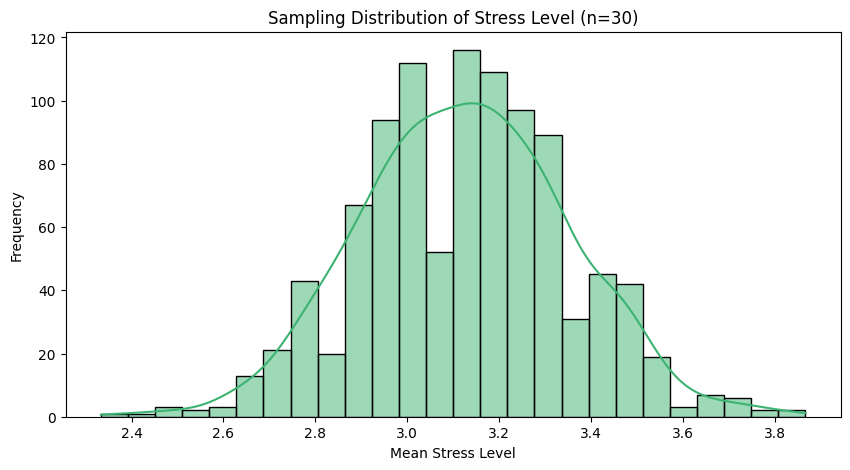

In [54]:
#  CLT Simulation
'''Q: Does the sampling distribution of the mean stress level become normal as n increases?'''

sample_means = []
for _ in range(1000):
    sample = df['stress_level'].dropna().sample(30, replace=True)
    sample_means.append(sample.mean())

plt.figure(figsize=(10, 5))
sns.histplot(sample_means, kde=True, color='mediumseagreen')
plt.title("Sampling Distribution of Stress Level (n=30)")
plt.xlabel("Mean Stress Level")
plt.ylabel("Frequency")
plt.show()

In [55]:
#  Bootstrapping Confidence Interval (95%)
'''Q: Estimate the 95% CI for average screen time:'''

bootstrap_means = []
for _ in range(1000):
    bootstrap_sample = df['screen_time_hours'].dropna().sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"95% CI for Screen Time Mean: ({ci_lower:.2f}, {ci_upper:.2f})")


95% CI for Screen Time Mean: (4.94, 5.04)


In [56]:
# Logistic Regression (Basic Inference Use-Case)

'''
Use logistic regression from statsmodels to:

--Study impact of predictors on a binary outcome
--Understand causal clues through coefficients and p-values'''

'\nUse logistic regression from statsmodels to:\n\n--Study impact of predictors on a binary outcome\n--Understand causal clues through coefficients and p-values'

In [57]:
'''
Setup:
Let’s answer this:
Q: What increases the chance of someone being diabetic?

We’ll model:
diabetic_flag ~ bmi, junk_food_freq, physical_activity_level, age, family_history_disease'''

'\nSetup:\nLet’s answer this:\nQ: What increases the chance of someone being diabetic?\n\nWe’ll model:\ndiabetic_flag ~ bmi, junk_food_freq, physical_activity_level, age, family_history_disease'

In [58]:
# Logistic Regression
import statsmodels.api as sm

In [59]:
# Encode categorical variables
df_model = df.copy()

df_model['junk_food_freq'] = df_model['junk_food_freq'].map({'Rarely':0, 'Sometimes':1, 'Daily':2})
df_model['physical_activity_level'] = df_model['physical_activity_level'].map({'Low':0, 'Moderate':1, 'High':2})

# Drop rows with missing required variables
df_model = df_model[['diabetic_flag', 'bmi', 'junk_food_freq', 'physical_activity_level', 'age', 'family_history_disease']].dropna()

# Define target and predictors
X = df_model[['bmi', 'junk_food_freq', 'physical_activity_level', 'age', 'family_history_disease']]
X = sm.add_constant(X)  # Add intercept
y = df_model['diabetic_flag']

# Fit logistic model
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.333656
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          diabetic_flag   No. Observations:                  559
Model:                          Logit   Df Residuals:                      554
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                 0.01022
Time:                        16:44:14   Log-Likelihood:                -186.51
converged:                       True   LL-Null:                       -188.44
Covariance Type:            nonrobust   LLR p-value:                    0.4267
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
bmi                         0.0158      0.035      0.444      0.657      -0.054   

In [60]:
'''
Stat	                    Meaning
coef	                    Change in log-odds of diabetes if predictor ↑
`P>	                        z
bmi ↑	                    Positive coef? → more likely diabetic
junk_food_freq	            Strong clue of diet-health link
family_history_disease	    Might be strongest driver'''

'\nStat\t                    Meaning\ncoef\t                    Change in log-odds of diabetes if predictor ↑\n`P>\t                        z\nbmi ↑\t                    Positive coef? → more likely diabetic\njunk_food_freq\t            Strong clue of diet-health link\nfamily_history_disease\t    Might be strongest driver'

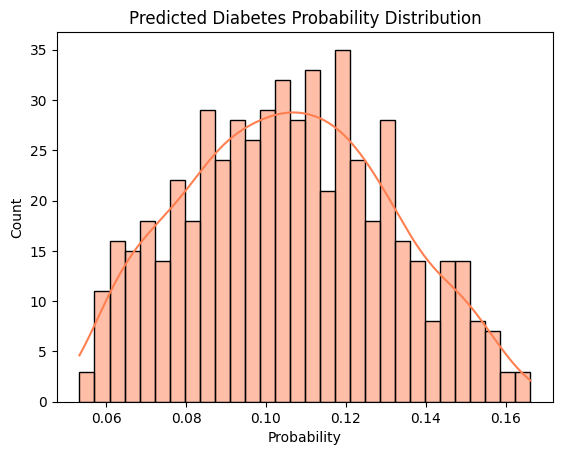

In [61]:
# Probability Curve

# Predict probabilities
df_model['pred_prob'] = model.predict(X)

# Visualize
sns.histplot(df_model['pred_prob'], bins=30, kde=True, color='coral')
plt.title("Predicted Diabetes Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


In [62]:
# Export cleaned dataset to CSV
df.to_csv("final_cleaned_health_dataset.csv", index=False)